# 🐧 EDA of beak depths of Darwin's finches - Case Study

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Functions

In [25]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from
    inds = np.arange(len(x))

    # Initialize samples
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Take samples
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

def permutation_sample(data_1, data_2):
    permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))
    return permuted_data[:len(data_1)], permuted_data[len(data_1):]

def draw_perm_reps(d1, d2, func, size=1):
    return np.array([func(*permutation_sample(d1, d2)) for i in range(size)])

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    return np.mean(data_1) - np.mean(data_2)

def pearson_r(data_1, data_2):
    return np.corrcoef(data_1, data_2)[0,1]

np.random.seed(42)

df_75 = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1397/datasets/finch_beaks_1975.csv')

df_12 = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1397/datasets/finch_beaks_2012.csv')

bd_2012 = df_12.loc[df_12.species=='scandens', 'bdepth'].values
bd_1975 = df_75.loc[df_75.species=='scandens', 'Beak depth, mm'].values

bl_2012 = df_12.loc[df_12.species=='scandens', 'blength'].values
bl_1975 = df_75.loc[df_75.species=='scandens', 'Beak length, mm'].values


df_fortis = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1397/datasets/fortis_beak_depth_heredity.csv')

df_scandens = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1397/datasets/scandens_beak_depth_heredity.csv')

bd_parent_fortis = ((df_fortis['Male BD'] + df_fortis['Female BD']) / 2).values
bd_offspring_fortis = df_fortis['Mid-offspr'].values
bd_parent_scandens = df_scandens.mid_parent.values
bd_offspring_scandens = df_scandens.mid_offspring.values

df_75 = df_75.rename(columns={'Beak depth, mm': 'beak_depth'})
df_12 = df_12.rename(columns={'bdepth': 'beak_depth'})
df_75['year'] = [1975]*len(df_75)
df_12['year'] = [2012]*len(df_12)
df = df_75.loc[df_75.species=='scandens', ['beak_depth', 'year']].append(df_12.loc[df_12.species=='scandens', ['beak_depth', 'year']],
                                          ignore_index=True)


/var/folders/pt/jyznl8l11dnchkwt6_m3kqy80000gn/T/ipykernel_16541/870393594.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_75.loc[df_75.species=='scandens', ['beak_depth', 'year']].append(df_12.loc[df_12.species=='scandens', ['beak_depth', 'year']],


## Describtion
Study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species **Geospiza scandens** has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, **Geospiza fortis**. These effects can lead to changes in the species over time.

In the next few problems, we will look at the beak depth of **G. scandens** on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot. 


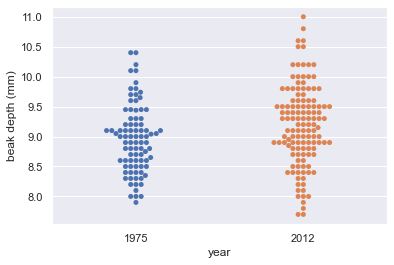

In [4]:
# Create bee swarm plot
_ = sns.swarmplot(x="year", y="beak_depth", data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

## Describtion

Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot. 

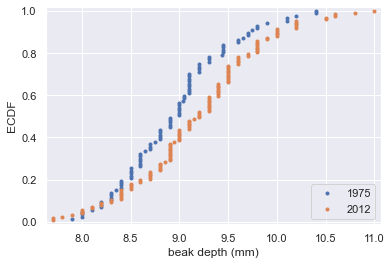

In [5]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

## Describtion

Estimate the **difference** of the mean beak depth of the **G. scandens** samples from 1975 and 2012 and report a 95% confidence interval.

In [12]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.05633521 0.39190544] mm


## Describtion

plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of **G. scandens** on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

In [13]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= ( np.mean(bd_2012) - np.mean(bd_1975) ) ) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0037


## Describtion

The beak length data are stored as `bl_1975` and `bl_2012`, again with units of millimeters (mm). we still have the beak depth data stored in `bd_1975` and `bd_2012`. Here we Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

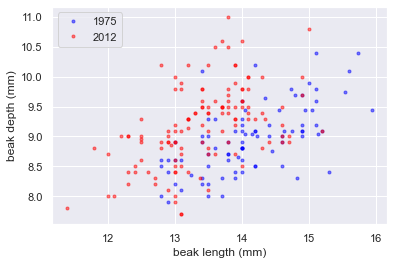

In [16]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

## Describtion

Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [17]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])

intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.465205169160593 conf int = [0.33851226 0.59306491]
1975: intercept = 2.390875236584227 conf int = [0.64892945 4.18037063]
2012: slope = 0.46263035883531317 conf int = [0.33137479 0.60695527]
2012: intercept = 2.9772474982360113 conf int = [1.06792753 4.70599387]


## Describtion
Now, we will display your linear regression results on the scatter plot, the code for which is already pre-written for you from your previous exercise. To do this, we will take the first 100 bootstrap samples (stored in `bs_slope_reps_1975`, `bs_intercept_reps_1975`, `bs_slope_reps_2012`, and `bs_intercept_reps_2012`) and plot the lines with `alpha=0.2` and `linewidth=0.5` keyword arguments to `plt.plot()`.


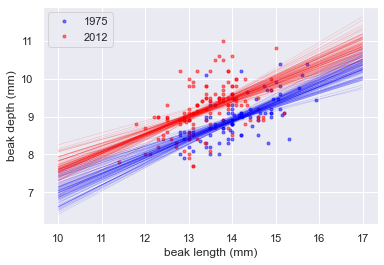

In [18]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

## Describtion

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the **ratio** of beak length to beak depth. Let's make that comparison. 

In [19]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55633932 1.60104148]
2012: mean ratio = 1.4658342276847767 conf int = [1.44405887 1.48750665]


## Describtion
In the previous exercise, we computed the mean beak length to depth ratio with 99% confidence intervals for 1975 and for 2012. The results of that calculation are shown graphically in the plot accompanying this problem.

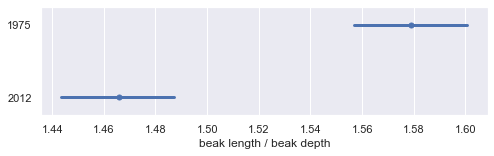

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(1, 1, figsize=(8, 2))

ax.set_ylim([-0.25, 1.25])
ax.set_yticks([0, 1])
ax.set_yticklabels(['2012', '1975'])
ax.grid(False, axis='y')

ax.plot([1.5788823771858533], [1], '.', markersize=10, color=sns.color_palette()[0])
ax.plot([1.55668803, 1.60073509], [1, 1], '-', linewidth=3, color=sns.color_palette()[0])
ax.plot([1.4658342276847767], [0], '.', markersize=10, color=sns.color_palette()[0])
ax.plot([1.44363932, 1.48729149], [0, 0], '-', linewidth=3, color=sns.color_palette()[0])

ax.set_xlabel('beak length / beak depth')

plt.show()

## Describtion
The array `bd_parent_scandens` contains the average beak depth (in mm) of two parents of the species `G. scandens`. The array `bd_offspring_scandens` contains the average beak depth of the offspring of the respective parents. The arrays `bd_parent_fortis` and `bd_offspring_fortis` contain the same information about measurements from **G. fortis** birds.

We will Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. And then we will use the `alpha=0.5` keyword argument to help you see overlapping points.

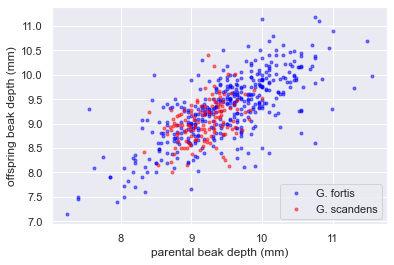

In [26]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


## Describtion
In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap. 

In [27]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

## Describtion
The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for **G. scandens**. Do the same for **G. fortis**. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

In [28]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


G. scandens: 0.41170636294012586 [0.26564228 0.54388972]
G. fortis: 0.7283412395518484 [0.6694112  0.77840616]


## Describtion
We should remeber that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the **variance of the parents alone**. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. We need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If we are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [29]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.5485340868685983 [0.35520904 0.75757246]
G. fortis: 0.7229051911438156 [0.65155209 0.79255002]


## Describtion
The heritability of beak depth in **G. scandens** seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. We will test that hypothesis here. To do this, we will do a pairs permutation test.

In [30]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)


# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)


p-val = 0.0
